In [1]:
from castle.common import GraphDAG
from castle.metrics import MetricsDAG
from castle.datasets import IIDSimulation, DAG
from castle.algorithms import PC

2023-11-09 16:17:14,628 - /home/flav/anaconda3/lib/python3.7/site-packages/castle/backend/__init__.py[line:37] - INFO: You can use `os.environ['CASTLE_BACKEND'] = backend` to set the backend(`pytorch` or `mindspore`).
2023-11-09 16:17:14,695 - /home/flav/anaconda3/lib/python3.7/site-packages/castle/algorithms/__init__.py[line:36] - INFO: You are using ``pytorch`` as the backend.


2023-11-09 16:17:14,710 - /home/flav/anaconda3/lib/python3.7/site-packages/castle/datasets/simulator.py[line:270] - INFO: Finished synthetic dataset


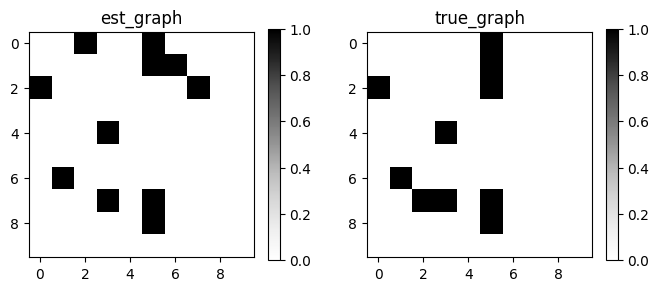

{'fdr': 0.1111, 'tpr': 0.8, 'fpr': 0.0286, 'shd': 2, 'nnz': 9, 'precision': 0.7273, 'recall': 0.8, 'F1': 0.7619, 'gscore': 0.5}


In [2]:
# data simulation, simulate true causal dag and train_data.
weighted_random_dag = DAG.erdos_renyi(n_nodes=10, n_edges=10, 
                                      weight_range=(0.5, 2.0), seed=1)
dataset = IIDSimulation(W=weighted_random_dag, n=2000, method='linear', 
                        sem_type='gauss')


true_causal_matrix, X = dataset.B, dataset.X

# structure learning
pc = PC()
pc.learn(X)

# plot predict_dag and true_dag
GraphDAG(pc.causal_matrix, true_causal_matrix, 'result')

# calculate metrics
mt = MetricsDAG(pc.causal_matrix, true_causal_matrix)
print(mt.metrics)

In [11]:
import pandas as pd
from castle.common import GraphDAG
from castle.metrics import MetricsDAG
from castle.datasets import DAG, IIDSimulation
from castle.algorithms import PC
from castle.common.priori_knowledge import PrioriKnowledge

2023-11-09 16:17:22,452 - /home/flav/anaconda3/lib/python3.7/site-packages/castle/datasets/simulator.py[line:270] - INFO: Finished synthetic dataset


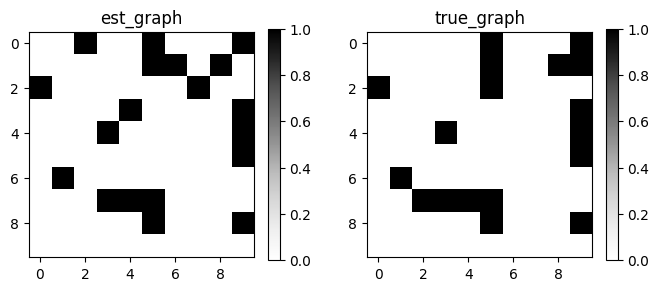

{'fdr': 0.0625, 'tpr': 0.8333, 'fpr': 0.037, 'shd': 3, 'nnz': 16, 'precision': 0.7895, 'recall': 0.8333, 'F1': 0.8108, 'gscore': 0.6111}


In [4]:
method = 'linear'
sem_type = 'gauss'
n_nodes = 10
n_edges = 15
n = 2000

# simulation for pc
weighted_random_dag = DAG.erdos_renyi(n_nodes=n_nodes, n_edges=n_edges, weight_range=(0.5, 2.0), seed=1)
dataset = IIDSimulation(W=weighted_random_dag, n=n, method=method, sem_type=sem_type)
true_dag, X = dataset.B, dataset.X

# PC learn
priori = PrioriKnowledge(X.shape[1])
priori.add_required_edges([(3, 9),
                           (4, 9),
                           (5, 9),
                           (8, 5),
                           (4, 3)])
priori.add_forbidden_edges([(8, 1),
                            (9, 5)])
pc = PC(variant='original', priori_knowledge=priori)
X = pd.DataFrame(X, columns=list('abcdefghij'))
pc.learn(X)

# plot predict_dag and true_dag
GraphDAG(pc.causal_matrix, true_dag)

# calculate accuracy
met = MetricsDAG(pc.causal_matrix, true_dag)
print(met.metrics)

2023-11-09 16:17:23,008 - /home/flav/anaconda3/lib/python3.7/site-packages/castle/datasets/simulator.py[line:270] - INFO: Finished synthetic dataset


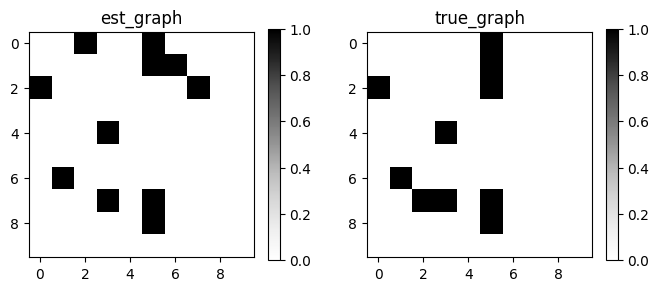

{'fdr': 0.1111, 'tpr': 0.8, 'fpr': 0.0286, 'shd': 2, 'nnz': 9, 'precision': 0.7273, 'recall': 0.8, 'F1': 0.7619, 'gscore': 0.5}


In [5]:
weighted_random_dag = DAG.erdos_renyi(n_nodes=10, n_edges=10, 
                                      weight_range=(0.5, 2.0), seed=1)
dataset = IIDSimulation(W=weighted_random_dag, n=2000, method='linear', 
                        sem_type='gauss')
true_causal_matrix, X = dataset.B, dataset.X


# structure learning
pc = PC()
pc.learn(X)

# # plot predict_dag and true_dag
GraphDAG(pc.causal_matrix, true_causal_matrix, 'result')

# # calculate metrics
mt = MetricsDAG(pc.causal_matrix, true_causal_matrix)
print(mt.metrics)

In [10]:
print(X)
print(true_causal_matrix)

true_causal_matrix.head(10)

[[-0.287  2.394  1.131 ... -1.107  2.017 -0.003]
 [-1.417 -1.063 -3.009 ...  1.156  0.428  1.178]
 [-0.954  0.531 -0.714 ...  0.791 -0.125  0.734]
 ...
 [ 1.225 -1.765  0.928 ... -0.29  -0.344  0.588]
 [ 0.236  0.866 -0.645 ...  1.115 -1.02   1.591]
 [-0.876  2.167 -1.328 ...  0.023 -0.127  0.596]]
[[0 0 0 0 0 1 0 0 0 0]
 [0 0 0 0 0 1 0 0 0 0]
 [1 0 0 0 0 1 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0]
 [0 0 0 1 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0]
 [0 1 0 0 0 0 0 0 0 0]
 [0 0 1 1 0 1 0 0 0 0]
 [0 0 0 0 0 1 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0]]


AttributeError: 'numpy.ndarray' object has no attribute 'head'

In [ ]:
import pandas as pd
import numpy as np
from castle.common import GraphDAG
from castle.metrics import MetricsDAG
from castle.datasets import DAG, Topology
from castle.algorithms import TTPM
from castle.competition import submission


# Read historic alarm data and topology data.
alarm_data = pd.read_csv('./datasets/2/Alarm.csv', encoding ='utf')
topology_matrix = np.load('./datasets/2/Topology.npy')

# Data preprocessing and causal structure learning
X = alarm_data.iloc[:,0:3]
X.columns=['event','node','timestamp']
X = X.reindex(columns=['event','timestamp','node'])

# X.head(10)
# causal structure learning using TTPM
ttpm = TTPM(topology_matrix)
ttpm.learn(X, max_hop=1,max_iter=20)


2023-11-09 14:05:40,341 - /home/flav/anaconda3/lib/python3.7/site-packages/castle/algorithms/ttpm/ttpm.py[line:225] - INFO: [iter 0]: likelihood_score = -643741.7192560973
2023-11-09 14:06:48,194 - /home/flav/anaconda3/lib/python3.7/site-packages/castle/algorithms/ttpm/ttpm.py[line:225] - INFO: [iter 1]: likelihood_score = -620598.6340815682
2023-11-09 14:07:53,263 - /home/flav/anaconda3/lib/python3.7/site-packages/castle/algorithms/ttpm/ttpm.py[line:225] - INFO: [iter 2]: likelihood_score = -605060.0877884048
2023-11-09 14:09:18,009 - /home/flav/anaconda3/lib/python3.7/site-packages/castle/algorithms/ttpm/ttpm.py[line:225] - INFO: [iter 3]: likelihood_score = -598078.7494113547
2023-11-09 14:10:46,759 - /home/flav/anaconda3/lib/python3.7/site-packages/castle/algorithms/ttpm/ttpm.py[line:225] - INFO: [iter 4]: likelihood_score = -593273.6697217354
2023-11-09 14:12:06,045 - /home/flav/anaconda3/lib/python3.7/site-packages/castle/algorithms/ttpm/ttpm.py[line:225] - INFO: [iter 5]: likeli

In [24]:
import tensorflow as tf


tf.config.run_functions_eagerly(True)

#Obtain estimated causal structure and save it
est_causal_matrix = ttpm.causal_matrix.to_numpy()
np.save('./2.npy',est_causal_matrix)

AttributeError: 'Tensor' object has no attribute 'to_numpy'

In [25]:
# Read true causal matrix
true_causal_matrix = np.load('./datasets/2/DAG.npy')

# Comparsion of the estimated graph and the true graph
GraphDAG(pc.causal_matrix, true_causal_matrix)

# calculate g-score
g_score = MetricsDAG(est_causal_matrix, true_causal_matrix).metrics['gscore']
print('g-score:%.3f'%g_score)

IndexError: index 3 is out of bounds for axis 0 with size 3